In [1]:
#!pip install matplotlib 

In [2]:
#!pip install seaborn 

In [26]:
#!pip install scipy

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)

In [4]:
df = pd.read_csv('archive/coaster_db.csv')

## Step 1: Data Understanding
- Dataframe `shape`
- `head` and `tail`
- `dtypes`
- `describe`

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   coaster_name                   1087 non-null   object 
 1   Length                         953 non-null    object 
 2   Speed                          937 non-null    object 
 3   Location                       1087 non-null   object 
 4   Status                         874 non-null    object 
 5   Opening date                   837 non-null    object 
 6   Type                           1087 non-null   object 
 7   Manufacturer                   1028 non-null   object 
 8   Height restriction             831 non-null    object 
 9   Model                          744 non-null    object 
 10  Height                         965 non-null    object 
 11  Inversions                     932 non-null    float64
 12  Lift/launch system             795 non-null    o

In [6]:
df['Status'].unique()

array(['Removed', 'Closed', 'Operating', nan, 'Not Currently Operating',
       'In Production', 'Discontinued',
       'closed for maintenance as of july 30 no reopening date known',
       'Closed in 2021', 'SBNO December 2019', 'Under construction',
       'Temporarily Closed', 'SBNO (Standing But Not Operating)',
       'Temporarily closed',
       'Chapter 7 bankruptcy; rides dismantled and sold; property sold',
       'Under Maintenance'], dtype=object)

In [7]:
#df['Manufacturer'].unique()
df['Manufacturer'].value_counts().idxmax()

'Vekoma'

In [8]:
manufacturer_counts = df['Manufacturer'].value_counts()
print(manufacturer_counts)

Manufacturer
Vekoma                      135
Bolliger & Mabillard        119
Intamin                      99
Mack Rides                   62
Arrow Dynamics               54
                           ... 
Wisdom Rides                  1
Art Engineering               1
Lagoon Corporation            1
Mack Rides GmbH & Co KG       1
Gravitykraft Corporation      1
Name: count, Length: 102, dtype: int64


# Step 2: Data Preperation¶
- Dropping irrelevant columns and rows
- Identifying duplicated columns
- Renaming Columns
- Feature Creation 

In [9]:
df = df[['coaster_name',
    # 'Length', 'Speed',
    'Location', 'Status',
    # 'Opening date',
    #   'Type',
    'Manufacturer',
#     'Height restriction', 'Model', 'Height',
#        'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
#        'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
#        'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
#        'Track layout', 'Fastrack available', 'Soft opening date.1',
#        'Closing date',
#     'Opened', 
    # 'Replaced by', 'Website',
#        'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
#        'Single rider line available', 'Restraint Style',
#        'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced',
        'latitude', 'longitude',
    'Type_Main',
       'opening_date_clean',
    #'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 
    #'height_value', 'height_unit',
    'height_ft',
       'Inversions_clean', 'Gforce_clean']].copy()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   coaster_name        1087 non-null   object 
 1   Location            1087 non-null   object 
 2   Status              874 non-null    object 
 3   Manufacturer        1028 non-null   object 
 4   year_introduced     1087 non-null   int64  
 5   latitude            812 non-null    float64
 6   longitude           812 non-null    float64
 7   Type_Main           1087 non-null   object 
 8   opening_date_clean  837 non-null    object 
 9   speed_mph           937 non-null    float64
 10  height_ft           171 non-null    float64
 11  Inversions_clean    1087 non-null   int64  
 12  Gforce_clean        362 non-null    float64
dtypes: float64(5), int64(2), object(6)
memory usage: 110.5+ KB


In [11]:
df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   coaster_name        1087 non-null   object        
 1   Location            1087 non-null   object        
 2   Status              874 non-null    object        
 3   Manufacturer        1028 non-null   object        
 4   year_introduced     1087 non-null   int64         
 5   latitude            812 non-null    float64       
 6   longitude           812 non-null    float64       
 7   Type_Main           1087 non-null   object        
 8   opening_date_clean  837 non-null    datetime64[ns]
 9   speed_mph           937 non-null    float64       
 10  height_ft           171 non-null    float64       
 11  Inversions_clean    1087 non-null   int64         
 12  Gforce_clean        362 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(2), obje

In [13]:
# Rename our columns
df = df.rename(columns={'coaster_name':'Coaster_Name',
                   'year_introduced':'Year_Introduced',
                   'opening_date_clean':'Opening_Date',
                   'speed_mph':'Speed_mph',
                   'height_ft':'Height_ft',
                   'Inversions_clean':'Inversions',
                   'Gforce_clean':'Gforce'})

In [14]:
df.isna().sum()

Coaster_Name         0
Location             0
Status             213
Manufacturer        59
Year_Introduced      0
latitude           275
longitude          275
Type_Main            0
Opening_Date       250
Speed_mph          150
Height_ft          916
Inversions           0
Gforce             725
dtype: int64

In [15]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1082    False
1083    False
1084    False
1085    False
1086    False
Length: 1087, dtype: bool

In [16]:
df.loc[df.duplicated()]

Empty DataFrame
Columns: [Coaster_Name, Location, Status, Manufacturer, Year_Introduced, latitude, longitude, Type_Main, Opening_Date, Speed_mph, Height_ft, Inversions, Gforce]
Index: []

In [17]:
# Check for duplicate coaster name
df.loc[df.duplicated(subset=['Coaster_Name'])]

Coaster_Name                   Location  \
43                 Crystal Beach Cyclone         Crystal Beach Park   
60                           Derby Racer               Revere Beach   
61           Blue Streak (Conneaut Lake)         Conneaut Lake Park   
167        Big Thunder Mountain Railroad                      Other   
237    Thunder Run (Canada's Wonderland)        Canada's Wonderland   
...                                  ...                        ...   
1063                  Lil' Devil Coaster  Six Flags Great Adventure   
1064  Little Dipper (Conneaut Lake Park)         Conneaut Lake Park   
1080                          Iron Gwazi    Busch Gardens Tampa Bay   
1082             American Dreier Looping                      Other   
1084           Tron Lightcycle Power Run                      Other   

                  Status                                       Manufacturer  \
43               Removed                                 Traver Engineering   
60               Removed                                     Fred W. Pearce   
61                Closed                                                NaN   
167                  NaN  Arrow Development (California and Florida)Dyna...   
237            Operating                                         Mack Rides   
...                  ...                                                ...   
1063           Operating                                           Zamperla   
1064           Operating                            Allan Herschell Company   
1080  Under construction                        Rocky Mountain Construction   
1082                 NaN                                  Anton Schwarzkopf   
1084                 NaN                                             Vekoma   

      Year_Introduced  latitude  longitude Type_Main Opening_Date  Speed_mph  \
43               1927   42.8617   -79.0598      Wood   1926-01-01       60.0   
60               1937   42.4200   -70.9860      Wood   1911-01-01        NaN   
61               1938   41.6349   -80.3180      Wood   1938-05-23       50.0   
167              1980       NaN        NaN     Steel          NaT       35.0   
237              1986   43.8427   -79.5423     Steel   1981-05-23       39.8   
...               ...       ...        ...       ...          ...        ...   
1063             2021   40.1343   -74.4434     Steel   1999-01-01        NaN   
1064             2021   41.6343   -80.3165     Steel   1950-01-01        NaN   
1080             2022   28.0339   -82.4231     Steel          NaT       76.0   
1082             2022       NaN        NaN     Steel          NaT       53.0   
1084             2022       NaN        NaN     Steel   2016-06-16       59.3   

      Height_ft  Inversions  Gforce  
43          NaN           0     4.0  
60          NaN           0     NaN  
61          NaN           0     NaN  
167         NaN           0     NaN  
237        32.8           0     NaN  
...         ...         ...     ...  
1063        NaN           0     NaN  
1064        NaN           0     NaN  
1080        NaN           2     NaN  
1082        NaN           3     4.7  
1084        NaN           0     4.0  

[97 rows x 13 columns]

In [18]:
# Checking an example duplicate
df.query('Coaster_Name == "Crystal Beach Cyclone"')

Coaster_Name            Location   Status        Manufacturer  \
39  Crystal Beach Cyclone  Crystal Beach Park  Removed  Traver Engineering   
43  Crystal Beach Cyclone  Crystal Beach Park  Removed  Traver Engineering   

    Year_Introduced  latitude  longitude Type_Main Opening_Date  Speed_mph  \
39             1926   42.8617   -79.0598      Wood   1926-01-01       60.0   
43             1927   42.8617   -79.0598      Wood   1926-01-01       60.0   

    Height_ft  Inversions  Gforce  
39        NaN           0     4.0  
43        NaN           0     4.0

In [19]:
df = df.loc[~df.duplicated(subset=['Coaster_Name','Location','Opening_Date'])] \
    .reset_index(drop=True).copy()

# Step 3: Feature Understanding
(Univariate analysis)

- Plotting Feature Distributions
    - Histogram
    - KDE
    - Boxplot

In [20]:
df['Year_Introduced'].value_counts()

Year_Introduced
1999    46
2000    45
1998    30
2001    29
2002    28
        ..
1952     1
1956     1
1961     1
1955     1
1959     1
Name: count, Length: 101, dtype: int64

Text(0, 0.5, 'Count')

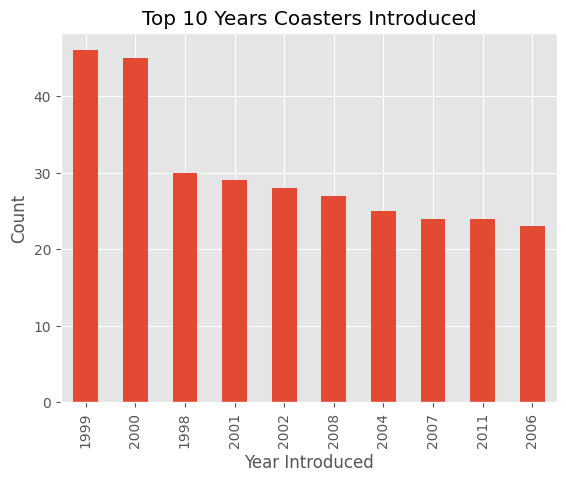

In [22]:
ax = df['Year_Introduced'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='Top 10 Years Coasters Introduced')
ax.set_xlabel('Year Introduced')
ax.set_ylabel('Count')

Text(0.5, 0, 'Speed (mph)')

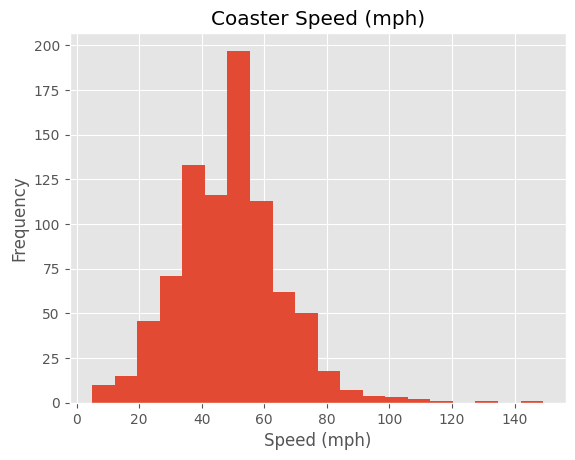

In [23]:
ax = df['Speed_mph'].plot(kind='hist',
                          bins=20,
                          title='Coaster Speed (mph)')
ax.set_xlabel('Speed (mph)')

Text(0.5, 0, 'Speed (mph)')

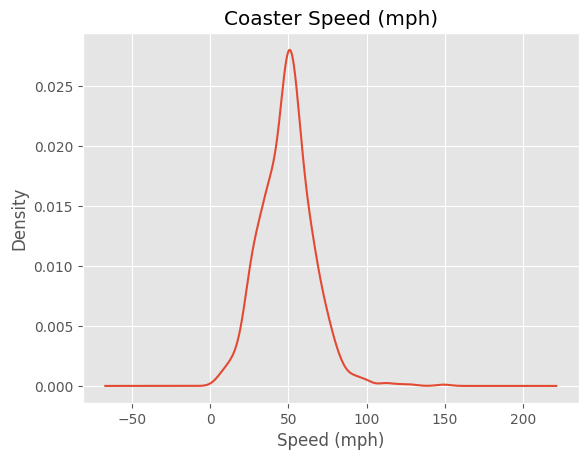

In [27]:
ax = df['Speed_mph'].plot(kind='kde',
                          title='Coaster Speed (mph)')
ax.set_xlabel('Speed (mph)')

# Step 4: Feature Relationships
- Scatterplot
- Heatmap Correlation
- Pairplot
- Groupby comparisons

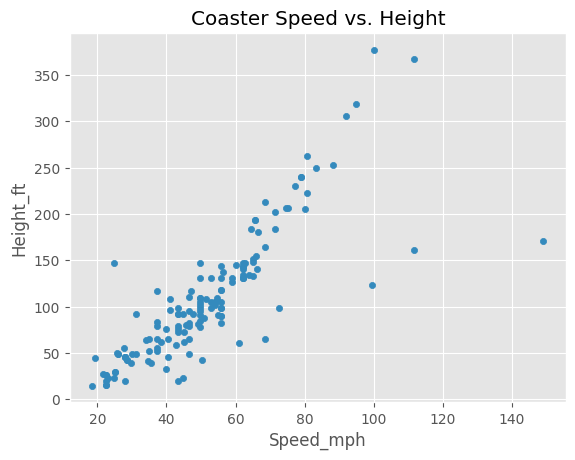

In [28]:
df.plot(kind='scatter',
        x='Speed_mph',
        y='Height_ft',
        title='Coaster Speed vs. Height')
plt.show()

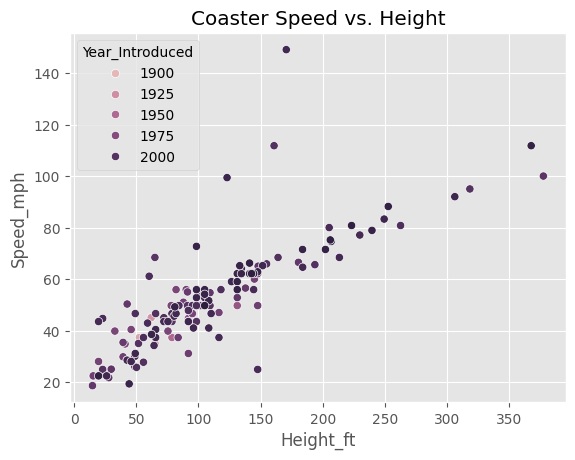

In [31]:
ax = sns.scatterplot(y='Speed_mph',
                x='Height_ft',
                hue='Year_Introduced',
                data=df)
ax.set_title('Coaster Speed vs. Height')
plt.show()

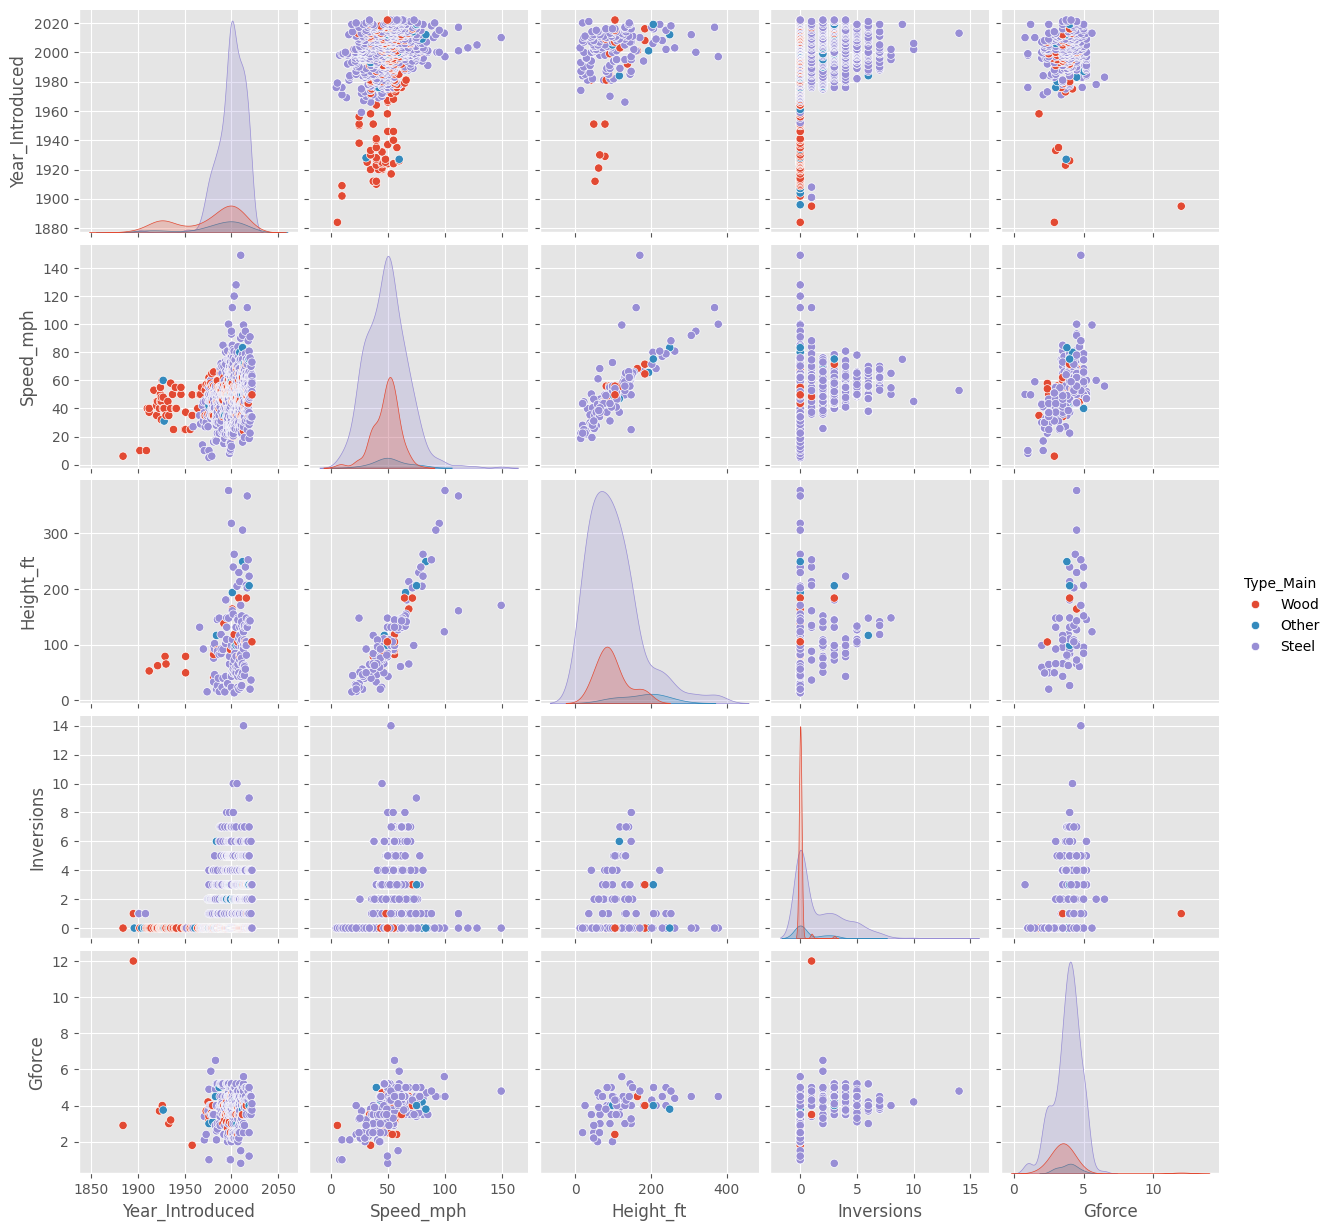

In [30]:
sns.pairplot(df,
             vars=['Year_Introduced','Speed_mph',
                   'Height_ft','Inversions','Gforce'],
            hue='Type_Main')
plt.show()

In [35]:
df_corr = df[['Year_Introduced','Speed_mph',
    'Height_ft','Inversions','Gforce']].corr()
df_corr

Year_Introduced  Speed_mph  Height_ft  Inversions    Gforce
Year_Introduced         1.000000   0.225991   0.249487    0.233701 -0.073403
Speed_mph               0.225991   1.000000   0.823216    0.246593  0.503828
Height_ft               0.249487   0.823216   1.000000    0.138286  0.480465
Inversions              0.233701   0.246593   0.138286    1.000000  0.339137
Gforce                 -0.073403   0.503828   0.480465    0.339137  1.000000

<Axes: >

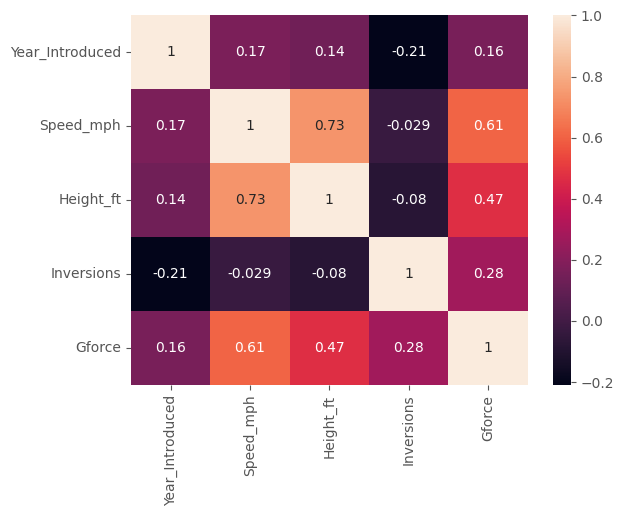

In [33]:
sns.heatmap(df_corr, annot=True)

# Step 5: Ask a Question about the data
- Try to answer a question you have about the data using a plot or statistic.

What are the locations with the fastest roller coasters (minimum of 10)?

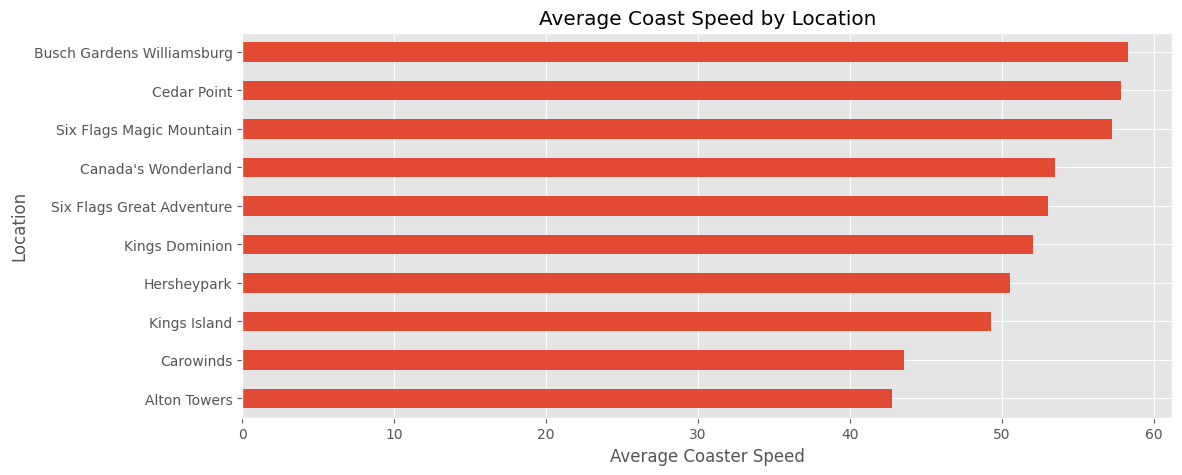

In [36]:
ax = df.query('Location != "Other"') \
    .groupby('Location')['Speed_mph'] \
    .agg(['mean','count']) \
    .query('count >= 10') \
    .sort_values('mean')['mean'] \
    .plot(kind='barh', figsize=(12, 5), title='Average Coast Speed by Location')
ax.set_xlabel('Average Coaster Speed')
plt.show()